<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/sequence/timeseries/pytorch_simple_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


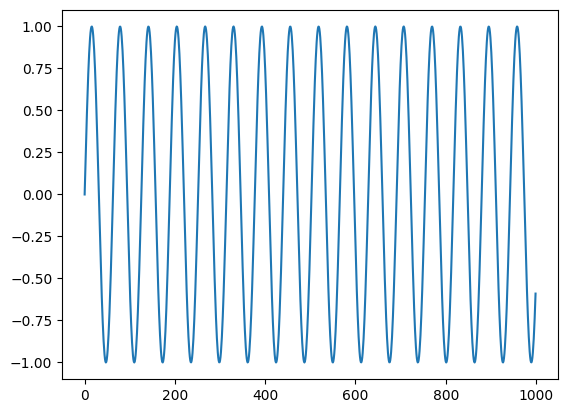

In [2]:
N=1000
series=np.sin(0.1*np.arange(N))
plt.plot(series)
plt.show()

In [4]:
#making windows slices
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y).reshape(-1,1)
N=len(X)

print(f"X.shape:{X.shape}, Y.shape: {Y.shape}")





X.shape:(990, 10, 1), Y.shape: (990, 1)


In [9]:
class SimpleRNN(nn.Module):
  def __init__(self,n_inp,n_hid,n_layers,n_out):
    super(SimpleRNN,self).__init__()
    self.D=n_inp
    self.M=n_hid
    self.K=n_out
    self.L=n_layers
    self.rnn=nn.RNN(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        nonlinearity="relu",
        batch_first=True

    )
    self.fc=nn.Linear(self.M,self.K)
  def forward(self,X):
    h0=torch.zeros(self.L,X.size(0),self.M)
    out,_=self.rnn(X,h0)
    out=self.fc( out[:,-1,:] )
    return out


In [10]:
model=SimpleRNN(1,5,1,1)
model

SimpleRNN(
  (rnn): RNN(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [11]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [12]:
X_train=torch.from_numpy(X[:-N//2].astype(np.float32))
y_train=torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test=torch.from_numpy(X[-N//2:].astype(np.float32))
y_test=torch.from_numpy(Y[-N//2:].astype(np.float32))

print(f"X_train.shape:{X_train.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"X_test.shape:{X_test.shape}")
print(f"y_test.shape:{y_train.shape}")

X_train.shape:torch.Size([495, 10, 1])
y_train.shape:torch.Size([495, 1])
X_test.shape:torch.Size([495, 10, 1])
y_test.shape:torch.Size([495, 1])


In [13]:
def train_test(model,criterion,optimizer,X_train,y_train,X_test,y_test,epochs=200):
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)
  for e in range(epochs):

    optimizer.zero_grad()
    outputs=model(X_train)
    loss=criterion(outputs,y_train)
    loss.backward()
    optimizer.step()
    train_losses[e]=loss.item()
    test_output=model(X_test)
    test_loss=criterion(test_output,y_test)
    test_losses[e]=test_loss.item()
    if (e+1) %5==0:
      print(f"Epoch {e+1}/{epochs}, train loss: {loss.item():.4f}, test loss: {test_loss.item():.4f}")
  return train_losses, test_losses



In [14]:
train_losses,test_losses=train_test(model,criterion,optimizer,X_train,y_train,X_test,y_test,)

Epoch 5/200, train loss: 0.2170, test loss: 0.1906
Epoch 10/200, train loss: 0.1266, test loss: 0.1173
Epoch 15/200, train loss: 0.0837, test loss: 0.0789
Epoch 20/200, train loss: 0.0542, test loss: 0.0495
Epoch 25/200, train loss: 0.0319, test loss: 0.0290
Epoch 30/200, train loss: 0.0179, test loss: 0.0153
Epoch 35/200, train loss: 0.0082, test loss: 0.0069
Epoch 40/200, train loss: 0.0041, test loss: 0.0037
Epoch 45/200, train loss: 0.0032, test loss: 0.0029
Epoch 50/200, train loss: 0.0025, test loss: 0.0024
Epoch 55/200, train loss: 0.0021, test loss: 0.0020
Epoch 60/200, train loss: 0.0017, test loss: 0.0016
Epoch 65/200, train loss: 0.0014, test loss: 0.0013
Epoch 70/200, train loss: 0.0011, test loss: 0.0010
Epoch 75/200, train loss: 0.0009, test loss: 0.0008
Epoch 80/200, train loss: 0.0007, test loss: 0.0006
Epoch 85/200, train loss: 0.0005, test loss: 0.0005
Epoch 90/200, train loss: 0.0004, test loss: 0.0004
Epoch 95/200, train loss: 0.0003, test loss: 0.0003
Epoch 100/200

[]

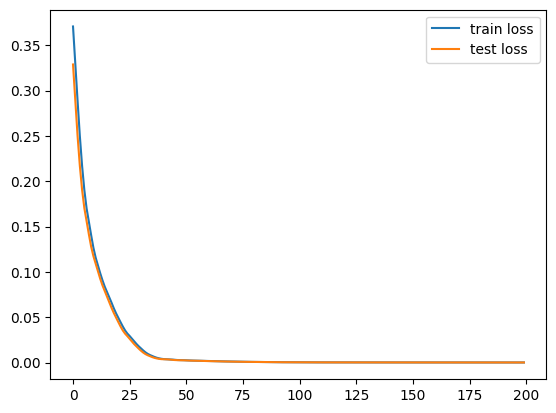

In [16]:
plt.plot(train_losses,label="train loss")
plt.plot(test_losses,label="test loss")
plt.legend()
plt.plot()

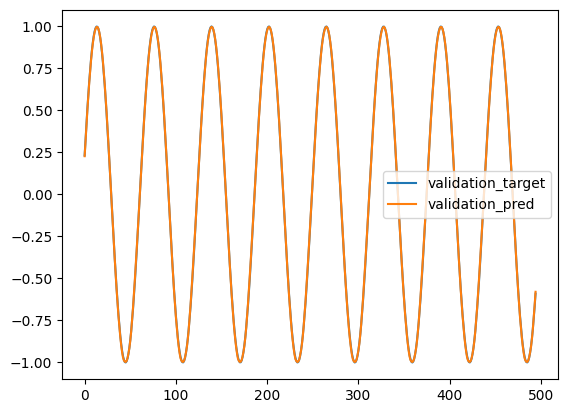

In [22]:
#invalid way forcasting
validation_target=Y[-N//2:]
validation_pred=[]
i=0

while len(validation_pred)< len(validation_target):
  input_=X_test[i].reshape(1,T,1)
  p=model(input_)[0,0].item()
  i=i+1
  validation_pred.append(p)
plt.plot(validation_target,label="validation_target")
plt.plot(validation_pred,label="validation_pred")
plt.legend()
plt.show()


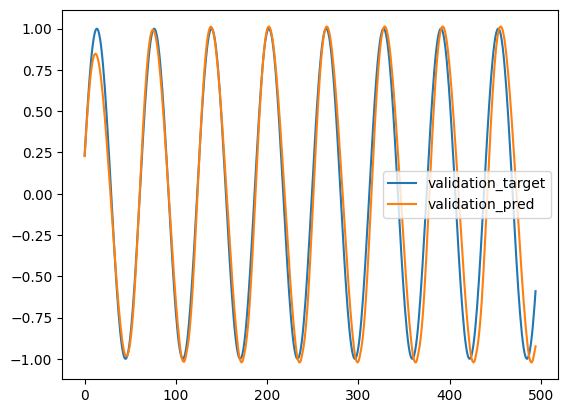

In [26]:
 #invalid way forcasting
validation_target=Y[-N//2:]
validation_pred=[]
last_x=X_test[0].view(T)
while len(validation_pred)< len(validation_target):
  input_=last_x.reshape(1,T,1)
  p=model(input_)

  validation_pred.append(p[0,0].item())
  last_x=torch.cat((last_x[1:],p[0]))
plt.plot(validation_target,label="validation_target")
plt.plot(validation_pred,label="validation_pred")
plt.legend()
plt.show()
